# Import Packages

In [1]:
import reconstruction_functions as rf
import ismrmrd.xsd
import numpy as np
from matplotlib import pyplot as plt

# Load File

Each patient has two datasets, the first one is the calibration dataset which has much lower resolution and is acquired in 3D. Second is a multi-slice 2D acquired dataset with high resolution. First dataset was used to calculate coil sentitivity maps for sense reocnstruction.

In [2]:
first_dataset_filepath = '/Users/tiago/Documents/FCT/Tese/files_for_tiago/data/0004/kspaces/meas_MID00460_FID707792_T2_TSE_tra_obl-out_1.mrd'
second_dataset_filepath = '/Users/tiago/Documents/FCT/Tese/files_for_tiago/data/0004/kspaces/meas_MID00460_FID707792_T2_TSE_tra_obl-out_2.mrd'
patient = 4

Convert the files to dataset object

In [3]:
dset = ismrmrd.Dataset(first_dataset_filepath, create_if_needed=False)
dset2 = ismrmrd.Dataset(second_dataset_filepath, create_if_needed=False)

Lets check files' headers

In [4]:
header = ismrmrd.xsd.CreateFromDocument(dset.read_xml_header())
header2 = ismrmrd.xsd.CreateFromDocument(dset2.read_xml_header())
print(header2)

ismrmrdHeader(version=None, subjectInformation=subjectInformationType(patientName=None, patientWeight_kg=79.0, patientHeight_m=None, patientID=None, patientBirthdate=None, patientGender='M'), studyInformation=studyInformationType(studyDate=None, studyTime=XmlTime(19, 50, 16, 0), studyID=None, accessionNumber=None, referringPhysicianName=None, studyDescription='rawmri_anonymizer_version=1.2|alBValue=0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0', studyInstanceUID=None, bodyPartExamined=None), measurementInformation=measurementInformationType(measurementID='46133_44815753_44815761_460', seriesDate=None, seriesTime=None, patientPosition=<patientPositionType.HFS: 'HFS'>, relativeTablePosition=None, initialSeriesNumber=None, protocolName='T2_TSE_tra obl', sequenceName=None, seriesDescription=None, measurementDependency=[measurementDependencyType(dependencyType='SenMap', measurementID='46133_44815753_44815761_445'), measurementDependencyType(dependencyType='Noise', measurementID='46133_44815753_44815761_4

Header's Encoding Information,more numeric Information

In [5]:
enc = header.encoding[0]
enc2 = header2.encoding[0]
print(enc2)

encodingType(encodedSpace=encodingSpaceType(matrixSize=matrixSizeType(x=640, y=688, z=1), fieldOfView_mm=fieldOfViewMm(x=360.0, y=386.640015, z=4.5)), reconSpace=encodingSpaceType(matrixSize=matrixSizeType(x=640, y=640, z=1), fieldOfView_mm=fieldOfViewMm(x=180.0, y=180.0, z=3.0)), encodingLimits=encodingLimitsType(kspace_encoding_step_0=None, kspace_encoding_step_1=limitType(minimum=0, maximum=550, center=275), kspace_encoding_step_2=limitType(minimum=0, maximum=0, center=0), average=limitType(minimum=0, maximum=2, center=0), slice=limitType(minimum=0, maximum=30, center=0), contrast=limitType(minimum=0, maximum=0, center=0), phase=limitType(minimum=0, maximum=0, center=0), repetition=limitType(minimum=0, maximum=0, center=0), set=limitType(minimum=0, maximum=0, center=0), segment=limitType(minimum=0, maximum=0, center=0), user_0=None, user_1=None, user_2=None, user_3=None, user_4=None, user_5=None, user_6=None, user_7=None), trajectory=<trajectoryType.CARTESIAN: 'cartesian'>, trajecto

 ### Some Usefull Information

Lets focus in one acquisition, each has their header information, and Data information.

In [6]:
print(dset2.number_of_acquisitions())
print(dset2.read_acquisition(0)) # choose any of the acquisitions

26351
Header:
 version: 1
flags: 262144
measurement_uid: 460
scan_counter: 1
acquisition_time_stamp: 28566615
physiology_time_stamp: 19372601, 0, 0
number_of_samples: 640
available_channels: 26
active_channels: 26
channel_mask: 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
discard_pre: 0
discard_post: 0
center_sample: 0
encoding_space_ref: 0
trajectory_dimensions: 0
sample_time_us: 12.0
position: -47.90361404418945, -22.68084716796875, -45.31647491455078
read_dir: -6.123032430856376e-17, 0.919135332107544, -0.3939419388771057
phase_dir: 1.0, 5.627895351071935e-17, -2.4121188849532226e-17
slice_dir: -8.271806125530277e-25, 0.3939419388771057, 0.919135332107544
patient_table_position: 0.0, 0.0, -1783005.0
idx: kspace_encode_step_1: 0
kspace_encode_step_2: 0
average: 0
slice: 0
contrast: 0
phase: 0
repetition: 0
set: 0
segment: 0
user: 0, 0, 0, 0, 0, 0, 0, 0

user_int: 0, 0, 0, 0, 0, 0, 0, 0
user_float: 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Trajectory:
 []
Data:
 [[ 1.3380777e-06+7.194

### Acquisition Head

![Head's Fields Description](Head2.png)
![Head's Fields Description](Head.png)

Second table information are the Encoding loop counters and can be found in the "idx" of the Header

In [7]:
#SOURCE:

Lets see more information about the Head, and the Data

In [8]:
# General  acquitition zero's Head
print(dset2.read_acquisition(0).getHead())

# Actual acquisition's shape
print("Acquisition 0 shape:")
print(np.shape(dset2.read_acquisition(1).data))

# Actual acquisition (Complex numbers)
print("Value form 0th acquisition:")
print(dset2.read_acquisition(0).data[0,1])

version: 1
flags: 262144
measurement_uid: 460
scan_counter: 1
acquisition_time_stamp: 28566615
physiology_time_stamp: 19372601, 0, 0
number_of_samples: 640
available_channels: 26
active_channels: 26
channel_mask: 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
discard_pre: 0
discard_post: 0
center_sample: 0
encoding_space_ref: 0
trajectory_dimensions: 0
sample_time_us: 12.0
position: -47.90361404418945, -22.68084716796875, -45.31647491455078
read_dir: -6.123032430856376e-17, 0.919135332107544, -0.3939419388771057
phase_dir: 1.0, 5.627895351071935e-17, -2.4121188849532226e-17
slice_dir: -8.271806125530277e-25, 0.3939419388771057, 0.919135332107544
patient_table_position: 0.0, 0.0, -1783005.0
idx: kspace_encode_step_1: 0
kspace_encode_step_2: 0
average: 0
slice: 0
contrast: 0
phase: 0
repetition: 0
set: 0
segment: 0
user: 0, 0, 0, 0, 0, 0, 0, 0

user_int: 0, 0, 0, 0, 0, 0, 0, 0
user_float: 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Acquisition 0 shape:
(26, 640)
Value form 0th acquisition:
(

Why shape (26, 640)?

In [9]:
print("Number of coils:")
print(dset2.read_acquisition(0)._head.active_channels)

print("Number of Samples:")
print(dset2.read_acquisition(0)._head.number_of_samples)


Number of coils:
26
Number of Samples:
640


Each acquisition represents one k-space line with 640 length for each coil.

What about the location of this acquisition in the k-space? And slice location?

In [10]:
print("Phase location:")
print(dset2.read_acquisition(0)._head.idx.kspace_encode_step_1)

print("Slice location:")
print(dset2.read_acquisition(0)._head.idx.slice)

Phase location:
0
Slice location:
0


# Plot Representation of acquisition Phase Locations in k-space

this functions calculate the echo train length and echo train count. However, they take a lot of time to run and these are constants from the pulse sequence. Consider using 25 and 11 integers instead.

In [11]:
#Echo Train Length
etl = rf.echo_train_length(dset2) #This fucntions are not maxi
#Number of Echo Trains per Average
etc = rf.echo_train_count(dset2)
#Number of Averages
n_averages = enc2.encodingLimits.average.maximum + 1

In [12]:
print(etl,etc, n_averages)

25 11 3


In [13]:
#We could, use for example, the array dset2.read_acquisition(n)._head.idx.average, averages = [] just turns the code cleaner and also makes the array editable
phase_lines = []
averages = []
slices = []

for n in range(dset2.number_of_acquisitions()):
    #All phase locations
    phase_lines.append(dset2.read_acquisition(n)._head.idx.kspace_encode_step_1)
    #All averages
    averages.append(dset2.read_acquisition(n)._head.idx.average)
    slices.append(dset2.read_acquisition(n)._head.idx.slice)

In [14]:
sequence = []
#All phase locations for one slice (two)
for n in range(dset2.number_of_acquisitions()):
    if slices[n] == 2:
        sequence.append(phase_lines[n])

Illustrative Plot: Representation of the phase location of each echo in all averages for one slice. Each dot represents 640 data values in the readout direction. Only the first 550 lines of the full 690 k-space lines are acquired. This image shows the acquisition order since time increases from left to right and in the columns from dark blue to dark red. All columns have 25 acquisitions. The unique dot in the first column also represents 25 acquisitions in the 275 phase-encoding steps.

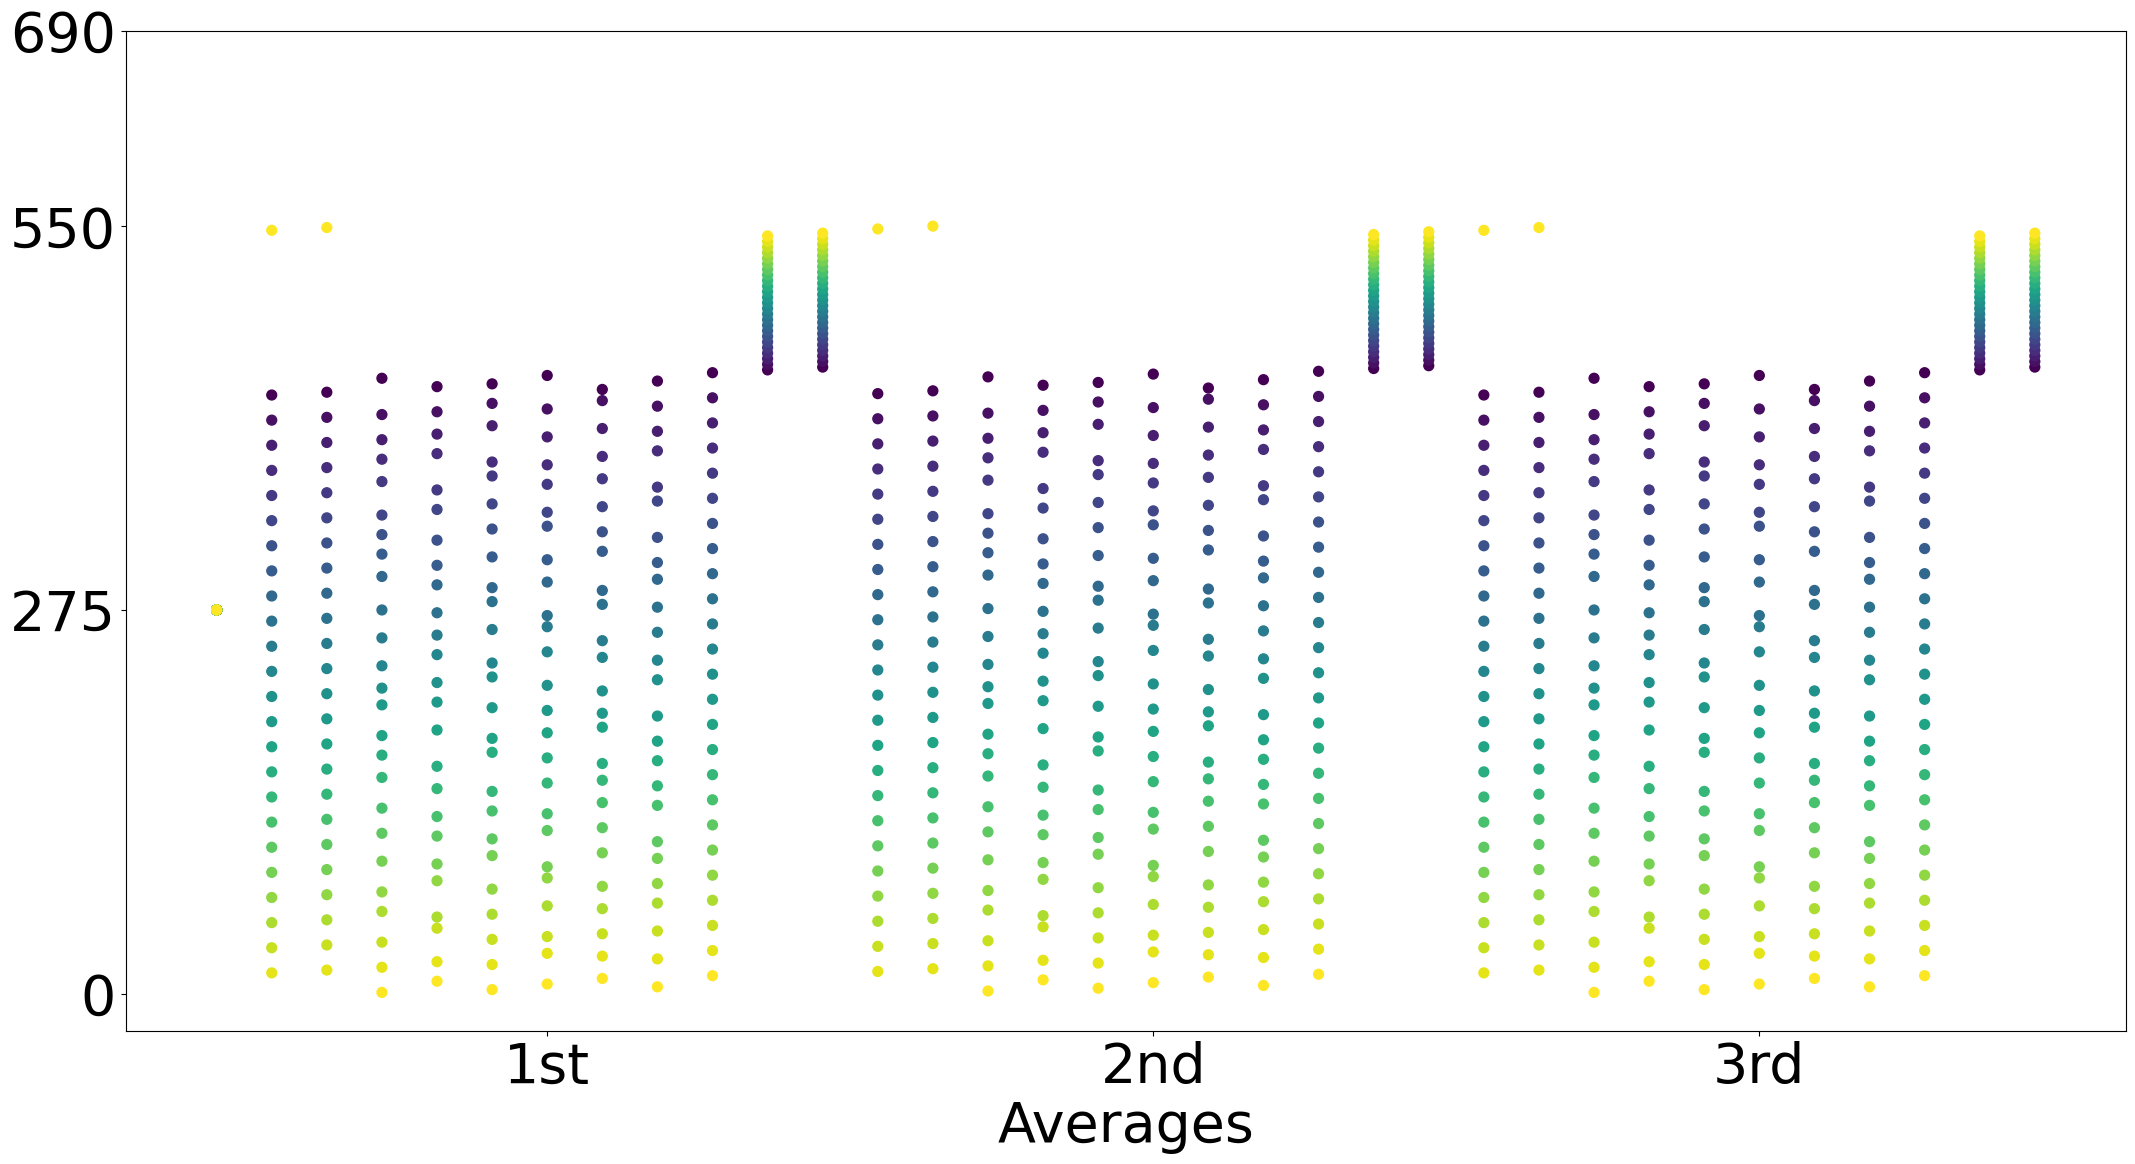

In [15]:
fig, ax = plt.subplots()

#Total number of Echo Trains
n_et = etc * n_averages

x =[]
for n in range(n_et+1):
    x = x + etl *[n]
x1 = range(n_et+1)

colors = np.array(np.linspace(15, 200, etl).tolist() * (n_et+1))

y = sequence

ax.scatter(x, y, s=50, c= colors)
rf.set_size(20,10)
plt.yticks([0,275,550,690], fontsize=40)
plt.xticks([6,17,28],['1st', '2nd', '3rd'], fontsize= 40)
plt.xlabel('Averages',fontsize= 40 )
plt.show()

Lets descriminate each average in a real size k-space plot

In [16]:
av1 = [] #RED
av2 = [] #GREEN
av3 = [] #BLUE
av4 = range(551,691) #BLACK

# 4 lists, one for each average plus a 4th for missing lines

for n in range(dset2.number_of_acquisitions()):
    if slices[n] == 2:
        if averages[n] == 0:  #RED
            av1.append(phase_lines[n])
        elif averages[n] == 1:
                av2.append(phase_lines[n]) #GREEN
        elif averages[n] == 2:
                av3.append(phase_lines[n]) #BLUE

av1 = av1[25:] #First Echo train is all in position 275, skipping that one

Ploting each line of k-space

In [17]:
av = [av1, av2, av3, av4]
x = [0,640]
from matplotlib.pyplot import figure

for a in range(len(av)):
    if a == 0:
        plt.plot(x,[av[a][0],av[a][0]], 'r', linewidth=3, label='Av. 1')
        for dot in av[a][1:]:
            plt.plot(x,[dot,dot], 'r', linewidth=3)

    elif a == 1:
        plt.plot(x,[av[a][0],av[a][0]], 'g', linewidth=3, label='Av. 2')
        for dot in av[a][1:]:
            plt.plot(x,[dot,dot], 'g', linewidth=3)

    elif a == 2:
        plt.plot(x,[av[a][0],av[a][0]], 'b', linewidth=3, label='Av. 3')
        for dot in av[a][1:]:
            plt.plot(x,[dot,dot], 'b', linewidth=3)

    elif a == 3:
        plt.plot(x,[av[a][0],av[a][0]], color = '0', linewidth=3, label='Missing')
        for dot in av[a][1:]:
            plt.plot(x,[dot,dot], color = '0', linewidth=3)

plt.legend(prop={'size': 100})
plt.xticks([0,320,640], fontsize=100)
plt.yticks([0,275,550,690], fontsize=100)
#figure(figsize=(100, 100), dpi=300)
rf.set_size(100,100)
plt.show()

The Plot is not Very illustrative and is huge but is the true size of the k-space with all lines descriminated. Average 1 is perfectly overlaped with the 3rd one.

# Convert Data to Numpy

In [18]:
all_data = rf.sample_data_ET_mask(dset2, etl, etc)

Found noise scan at acq  0
Imaging acquisition starts acq  1


### Create Subsampled k-sapces

K-spaces are 689 x 640, the point is to crop to a square with side of a power of two without lose any anatomical information. For that purpose, we crop within the same ratio and make the bigger side 512. After that, in image space the point is to pad the image with zeros until it becomes 512 x 512. Power os two is better for higher subsampling rates.

In [19]:
#Slices are not acquired in a correct order so lets reorder them
all_data = rf.image_order(all_data)
#Crop maintaining the ratio (689,640) while leaving the first dimention as a power of 2 This would help for reconstructions in high rates. If only R2 and R4 are made this could be less cropped.
all_data = rf.crop_array(all_data, 512, 476)

Center of k-space is saved for grappa algorithm

In [20]:
calib = all_data.copy()[:, :,0,  335:355, :]

Post Processing

In [21]:
#Choosing a slice for plots, this procedure was initially iterated over all slices
slice = 4

In [22]:
#All data proper deep copy so that all_data is maintained
#Create sumbampling k-spaces
r2 = rf.homogeneous_mask(all_data.copy(), 2)
r4 = rf.homogeneous_mask(all_data.copy(), 4)
r8 = rf.homogeneous_mask(all_data.copy(), 8)

# Convert all k-spaces to image

In [23]:
coils_im = rf.transform_kspace_to_image(all_data[slice, :,0, :, :].copy(), [1, 2])
coils_im2 = rf.transform_kspace_to_image(r2[slice, :,0, :, :].copy(), [1, 2])
coils_im4 = rf.transform_kspace_to_image(r4[slice, :,0, :, :].copy(), [1, 2])
coils_im8 = rf.transform_kspace_to_image(r8[slice, :,0, :, :].copy(), [1, 2])

Pad images so that the 512 x 476 is converted to 512 x 512

In [24]:
coils_im = rf.pad_image_stack(coils_im)
coils_im2 = rf.pad_image_stack(coils_im2)
coils_im4 = rf.pad_image_stack(coils_im4)
coils_im8 = rf.pad_image_stack(coils_im8)

### Representation of the first 4 coil from all data

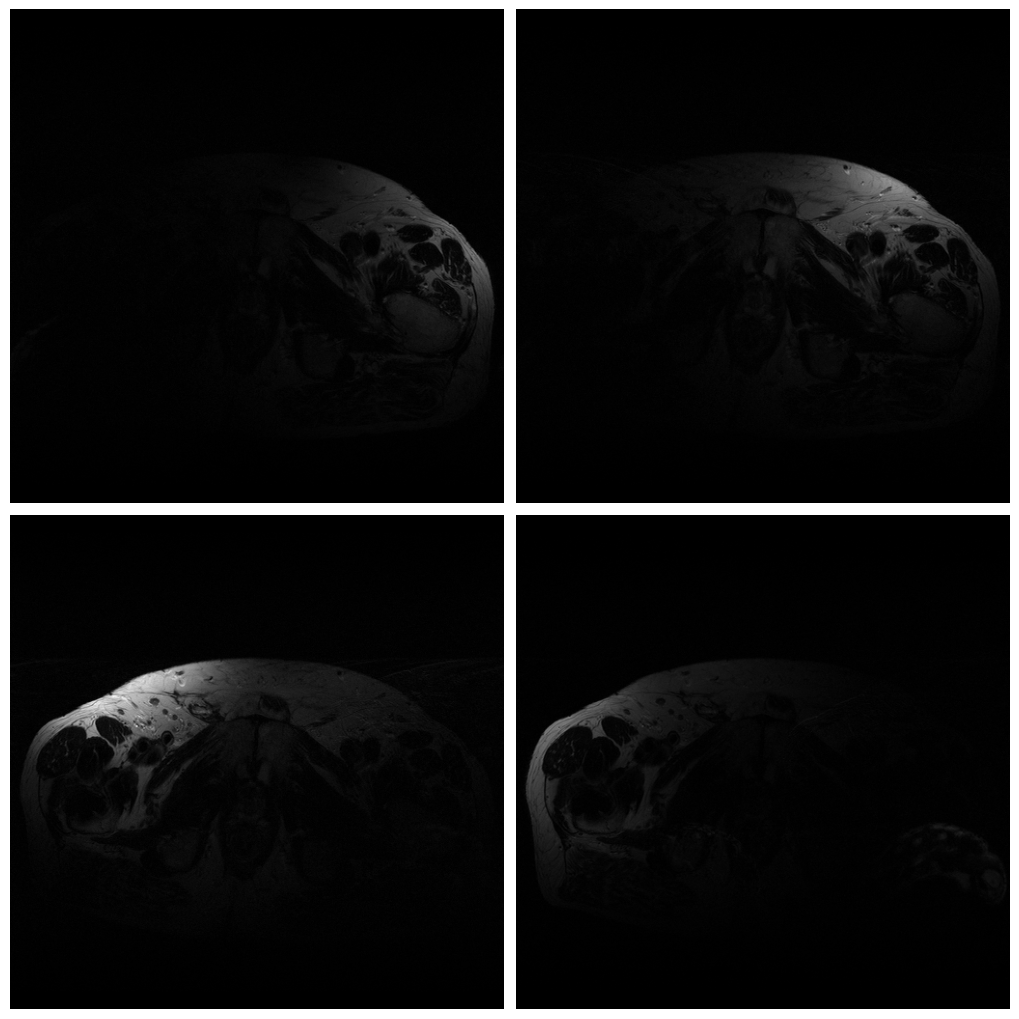

In [25]:
rf.imshow(np.abs(np.rot90(coils_im[:4],axes = (1,2))), cmap="gray", tile_shape=(2,2), colorbar=False, size=[10, 10])

### Representation of the first 4 coil from r2

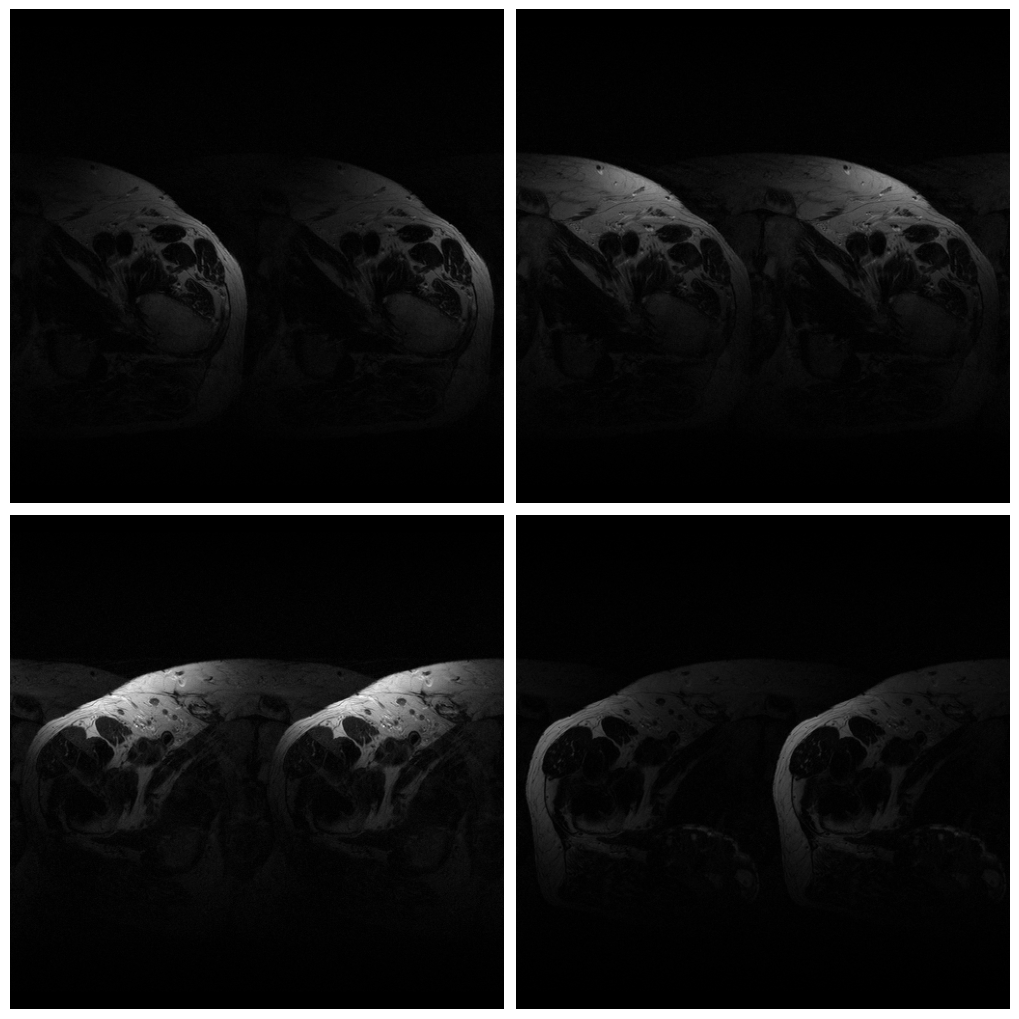

In [26]:
rf.imshow(np.abs(np.rot90(coils_im2[:4], axes = (1,2))), cmap="gray", tile_shape=(2, 2), colorbar=False, size=[10, 10])

# Ground Truth

How do we merge all coils' images ? Let's get our Ground Thruth

### Root Sum of Squares

In [27]:
gt = np.sqrt(np.sum(np.abs(coils_im) ** 2, 0))

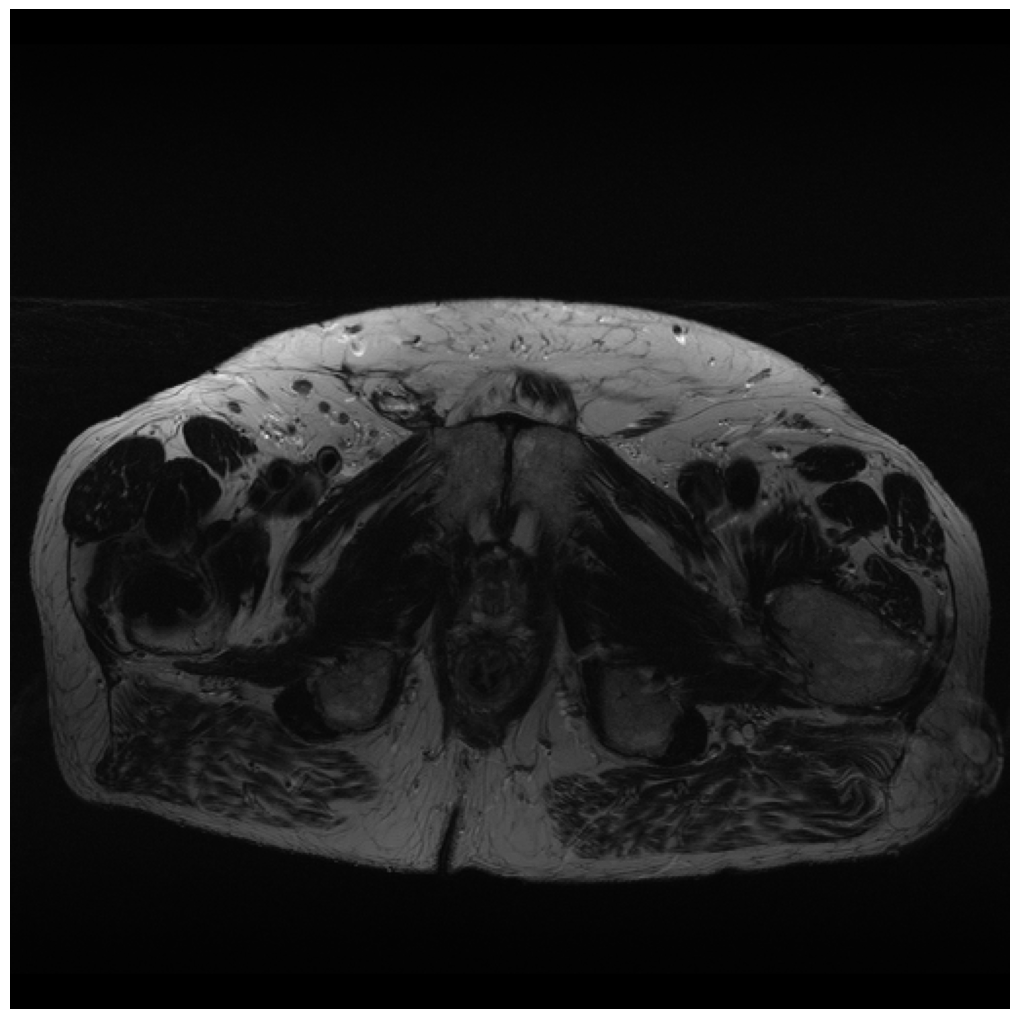

In [28]:
rf.imshow(np.rot90(gt), cmap="gray", tile_shape=(1,1), colorbar=False, size=[10, 10])

# Now it's time to reconstruct the others!

Let's start with GRAPPA
> Note that to recreate same results as GRAPPA calibrated once, change the calib[] index to a fixed value that is the half slice of the acquisition. Even though we are using slice 4, in this case the calibration should come from the middle slice for that algorithm.

In [29]:
#GRAPPA Transformation, in k-space
grappa2 = rf.grappa(r2[slice, :, 0].copy(), calib[slice], kernel_size=(3, 3), coil_axis=0)
grappa4 = rf.grappa(r4[slice, :, 0].copy(), calib[slice], kernel_size=(5, 5), coil_axis=0)
grappa8 = rf.grappa(r8[slice, :, 0].copy(), calib[slice], kernel_size=(9, 9), coil_axis=0)

#k-spcae to image
coils_g2 = rf.transform_kspace_to_image(grappa2, [1, 2])
coils_g4 = rf.transform_kspace_to_image(grappa4, [1, 2])
coils_g8 = rf.transform_kspace_to_image(grappa8, [1, 2])

Pad the coils images

In [30]:
coils_g2 = rf.pad_image_stack(coils_g2)
coils_g4 = rf.pad_image_stack(coils_g4)
coils_g8 = rf.pad_image_stack(coils_g8)

### Plot of all coils of 4th slice after reconstructing the subsampling rate 4 wih GRAPPA:

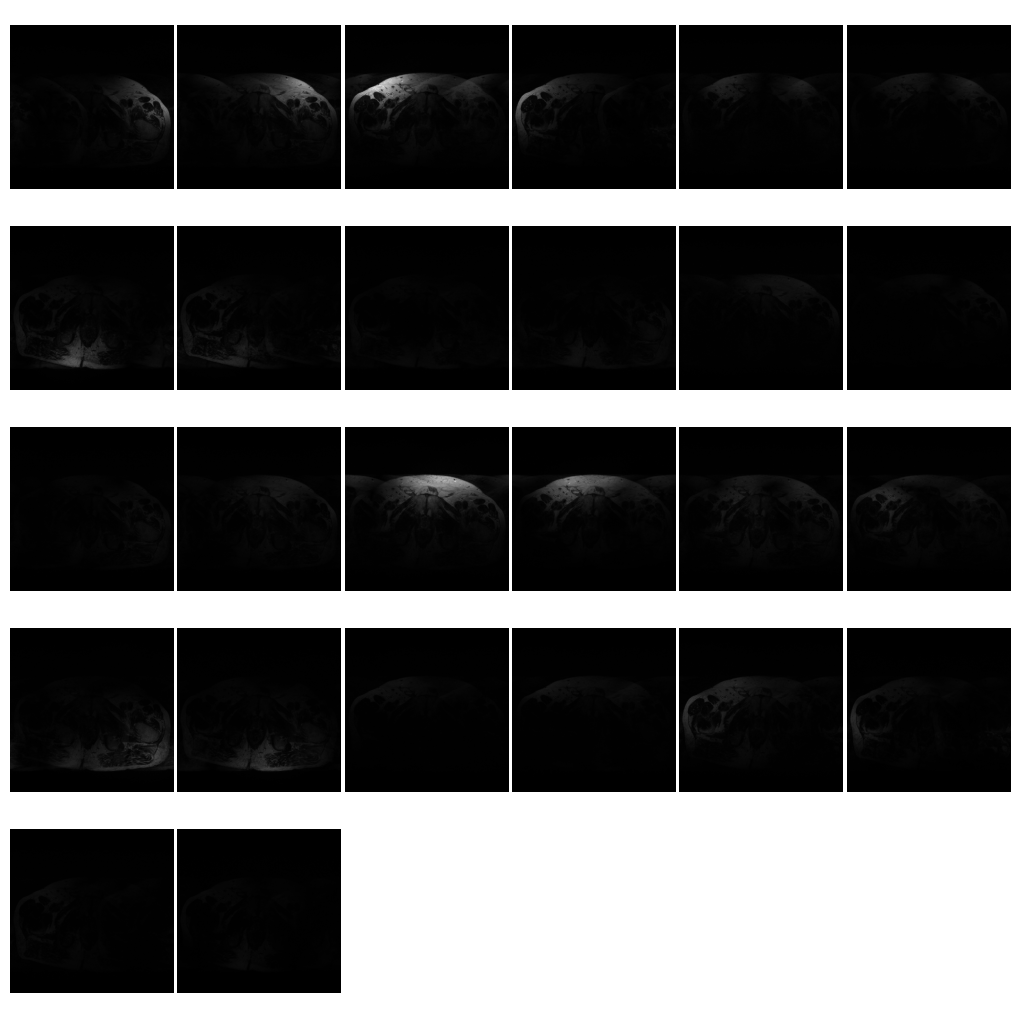

In [31]:
rf.imshow(np.rot90(np.abs(coils_g4), axes = (1,2)), cmap="gray", tile_shape=(5,6), colorbar=False, size=[10, 10])

Merge as done for the ground truth

In [32]:
g2 = np.sqrt(np.sum(np.abs(coils_g2) ** 2, 0))
g4 = np.sqrt(np.sum(np.abs(coils_g4) ** 2, 0))
g8 = np.sqrt(np.sum(np.abs(coils_g8) ** 2, 0))

Normalize all images

In [33]:
gt = gt / gt.max()
g2 = g2 / g2.max()
g4 = g4 / g4.max()
g8 = g8 / g8.max()

### Plot of final images for of 4th slice after reconstructing all subsampling rates GRAPPA:


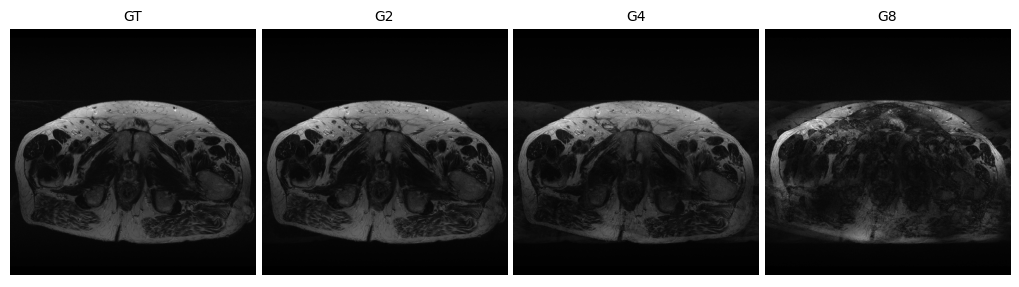

In [34]:
rf.imshow(np.rot90(np.array([gt,g2,g4,g8]), axes=(1,2)) , cmap="gray", titles = ["GT","G2","G4","G8"], fontsize = 10,tile_shape=(1,4), colorbar=False, size=[10, 2.5])

Let's do SENSE!

In [35]:
first_data = rf.sample_data_ET_mask(dset,etl,etc)

Found noise scan at acq  0
Found noise scan at acq  1
Found noise scan at acq  2
Found noise scan at acq  3
Found noise scan at acq  4
Found noise scan at acq  5
Found noise scan at acq  6
Found noise scan at acq  7
Found noise scan at acq  8
Found noise scan at acq  9
Found noise scan at acq  10
Found noise scan at acq  11
Found noise scan at acq  12
Found noise scan at acq  13
Found noise scan at acq  14
Found noise scan at acq  15
Found noise scan at acq  16
Found noise scan at acq  17
Found noise scan at acq  18
Found noise scan at acq  19
Found noise scan at acq  20
Found noise scan at acq  21
Found noise scan at acq  22
Found noise scan at acq  23
Found noise scan at acq  24
Found noise scan at acq  25
Found noise scan at acq  26
Found noise scan at acq  27
Found noise scan at acq  28
Found noise scan at acq  29
Found noise scan at acq  30
Found noise scan at acq  31
Found noise scan at acq  32
Found noise scan at acq  33
Found noise scan at acq  34
Found noise scan at acq  35
Fo

Noise is never used in this study, something to look forward in future works.

In [36]:
print(np.shape(first_data))

(1, 26, 64, 65, 128)


Padding in zy plane since this is the read-phase plane initially, I didn't try to firstly rotate because I wanted all the transformations besides zero padding to be done in image space. However it could be a possibility to rotate the axes first and then zero pad in xy.

10.399 is the multiplication factor by which the k-space will increase.
The calibration data is given as a 64 $\times$ 64 px matrix, each with a
FOV of 500 $\times$ 500 mm. It is needed to increase the resolution and
decrease the FOV. High-resolution images used to have a 360 $\times$
384.64 mm FOV. As mentioned in the last paragraph, the minor direction
was filled with zeros, so we can calculate the proportion to be cropped
in the more significant dimension. To get the same FOV, the smaller
image must be cropped until $(\frac{384.64}{500} \times 100) \%$ of its
size in both directions since we want to match the square ratio. To
increase its resolution, zero-padding in k-space is used. We want to
increase its size so that, after the crop in image space, the size is
512 $\times$ 512 pixels. Moving from the end backward, the length before
cropping needs to be $\frac{500}{384.64} \times 512 \approx 666$ px
side. Summarising, k-space is firstly zero-padded, increasing image size
by $\frac{500}{384.64} \times \frac{512}{64} = 10.40$ times, and then
cropped as 512 $\times$ 512px.

In [38]:
first_data_zero_padded = rf.zero_pad_zy(first_data.copy(),10.399)

Here is needed an 1D array with the size of the slices, for example (1,30) with the z locations from one edge to the other of the acquisition. These are the actual locations in millimeters. If we know exaclty the location of each slice (second dataset) with respect to the isocenter, and we also know that the first dataset is centered and have 128 2D arrays equally distributed over 1m distance in slice direction, we can chose which image from the 1st dataset 3D volume its closer to each slice. (Nearest Neighbour interpolation) - Other interpolations could be tried.

In [39]:
all_z = [dset2.read_acquisition(n)._head.position[2] for n in range(dset2.number_of_acquisitions())]
z = sorted(set(all_z))

The patient is not perfectly centered in the read-phase plane so the MRI technician had to crop the view with some offset values to center it. Any of this procidure is made in the first dataset so we are doing it manually. Remember the ultimate goal is to have both of them with the same shape and perfectly overlaped.

Getting offset information

In [40]:
for n in range(dset.number_of_acquisitions()):
    if all_z[n] == z[slice]:  # Find one acquisition of the wanted slice.
        img_pos = np.array(dset2.read_acquisition(n)._head.position)
        break

offset_y = img_pos[1]
offset_x = img_pos[0]

3D Inverse FFT in the first dataset volume

In [41]:
first_data_im = np.zeros_like(first_data_zero_padded[0])

ncoils = header.acquisitionSystemInformation.receiverChannels
for c in range(ncoils):
    first_data_im[c] = rf.transform_kspace_to_image(first_data_zero_padded[0,c, :, :, :])
    print("Coil ", c, ' done')

Coil  0  done
Coil  1  done
Coil  2  done
Coil  3  done
Coil  4  done
Coil  5  done
Coil  6  done
Coil  7  done
Coil  8  done
Coil  9  done
Coil  10  done
Coil  11  done
Coil  12  done
Coil  13  done
Coil  14  done
Coil  15  done
Coil  16  done
Coil  17  done
Coil  18  done
Coil  19  done
Coil  20  done
Coil  21  done
Coil  22  done
Coil  23  done
Coil  24  done
Coil  25  done


In [42]:
print(np.shape(first_data_im))

(26, 665, 675, 128)


Post process to get from to xyz shape order

In [43]:
first_data_im = np.rollaxis(first_data_im, 3, 1)
first_data_im = np.flip(first_data_im, 3)
print(np.shape(first_data_im))

(26, 128, 665, 675)


crop to 512 x 512 with the respective offset all cropping should be done in image space so it doesn't deform the image.

In [44]:
coil_images = rf.crop_array(first_data_im, 512, 512, offset_x, offset_y)

Finding the index of the 2D array that has the closest location of the wanted slice. Locations of the first dataset are created by np.linspace(-500, 500, 128), from -500mm to 500 mm equally divided into 128 "slices". After that it is checked the minimum difference with our second dataset slice. "find" is now our corresponding image from first dataset.

In [45]:
find = np.argmin(abs(np.linspace(-500, 500, 128) - z[slice]))

Let's see 4 coils' images of the found slice (First dataset)

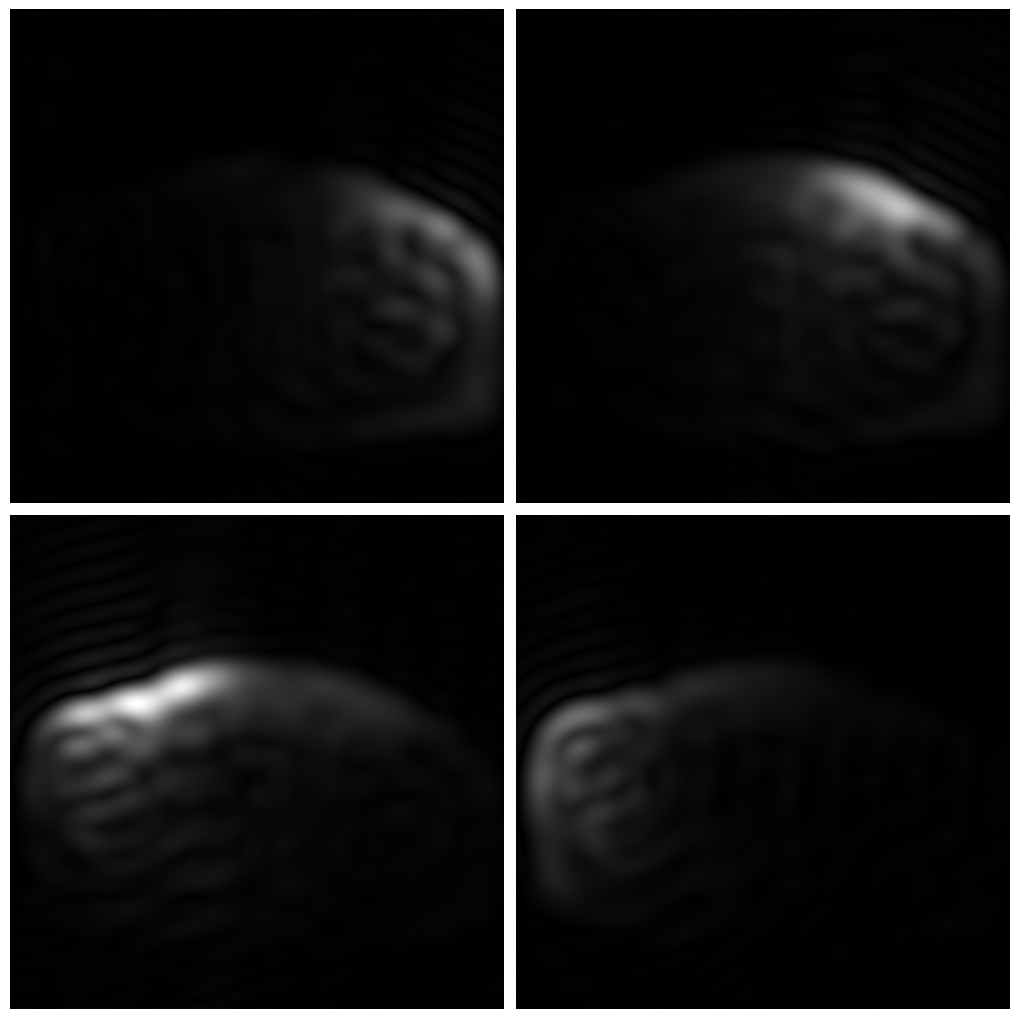

In [46]:
rf.imshow(np.abs(np.rot90(coil_images[:4,find],axes=(1,2))), cmap="gray", tile_shape=(2,2), colorbar=False, size=[10, 10])

Using walsh method for coil sensitivity maps, more information on the reconstruction_functions.py file.

In [47]:
print("Conv2D on going...")
coil_images_test = np.swapaxes(coil_images[:, find], 0, 2)
csm_est_test = rf.ismrm_estimate_csm_walsh(coil_images_test, 100)
csm_est_test = np.swapaxes(csm_est_test, 0, 2)
print("Conv2D Done")


Conv2D on going...


/Users/tiago/Documents/FCT/Tese/files_for_tiago/RSS/GitHub/reconstruction_functions.py:951: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ndimage.filters.uniform_filter(img.real, size=box, output=t_real)
/Users/tiago/Documents/FCT/Tese/files_for_tiago/RSS/GitHub/reconstruction_functions.py:952: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ndimage.filters.uniform_filter(img.imag, size=box, output=t_imag)


Conv2D Done


## Coil Sensitivity Maps

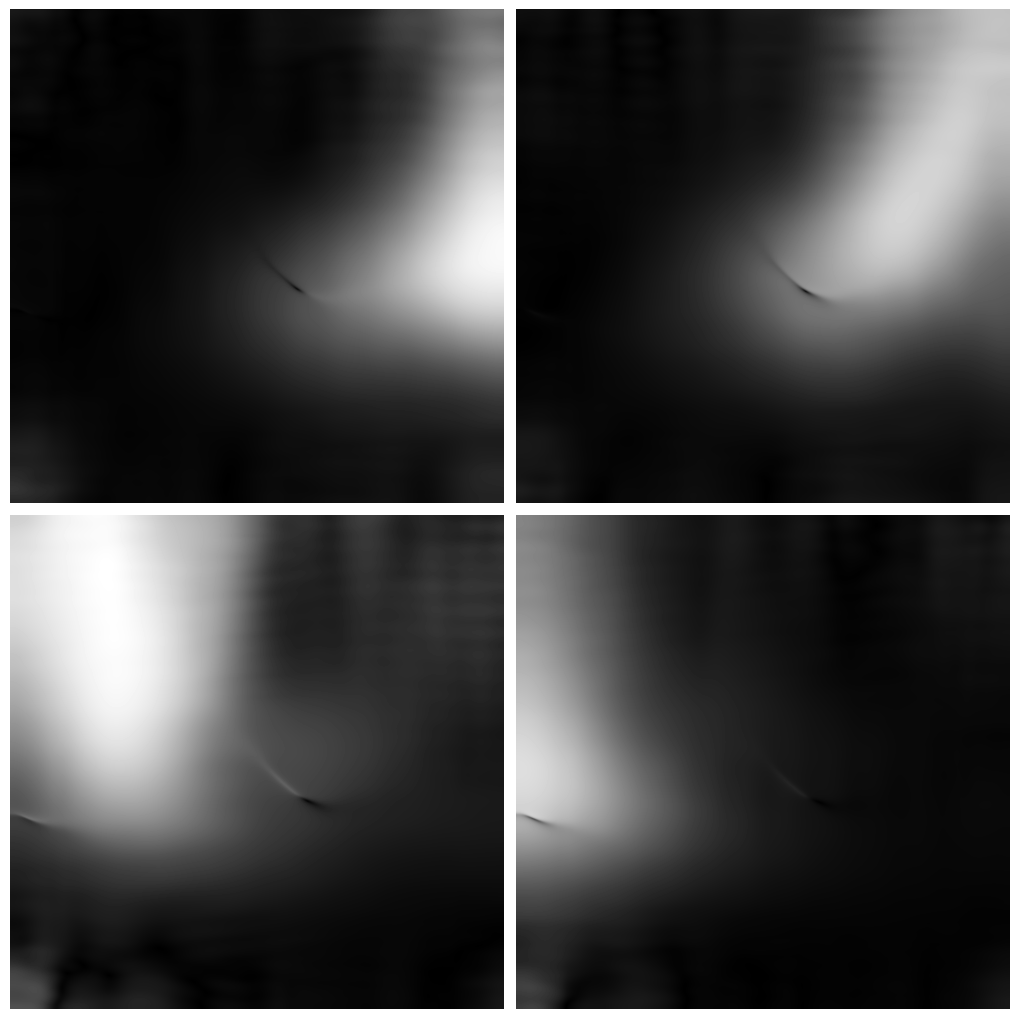

In [48]:
rf.imshow(np.abs(np.rot90(csm_est_test[:4],axes=(1,2))), cmap="gray", tile_shape=(2,2), colorbar=False, size=[10, 10])

Preform the SENSE algorithm

In [49]:
# First start by calculating the unmix sense this procedure is better understood if we get into the algebra, check the reconstruction_functions.py
(unmix_sense2, gmap_sense) = rf.calculate_sense_unmixing(2,csm_est_test,regularization_factor = 1)
(unmix_sense4, gmap_sense) = rf.calculate_sense_unmixing(4,csm_est_test,regularization_factor = 1)
(unmix_sense8, gmap_sense) = rf.calculate_sense_unmixing(8,csm_est_test,regularization_factor = 1)

# Unwrapping each coil image
s2 = np.squeeze(np.sum(coils_im2 * unmix_sense2,0))
s4 = np.squeeze(np.sum(coils_im4 * unmix_sense4,0))
s8 = np.squeeze(np.sum(coils_im8 * unmix_sense8,0))

/Users/tiago/Documents/FCT/Tese/files_for_tiago/RSS/GitHub/reconstruction_functions.py:1021: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  A = np.matrix(csm1d[:, b:ny:nblocks]).T
/Applications/miniconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


Normalize all images

In [50]:
s2 = s2 / s2.max()
s4 = s4 / s4.max()
s8 = s8 / s8.max()

### Plot of final images for of 4th slice after reconstructing all subsampling rates SENSE:


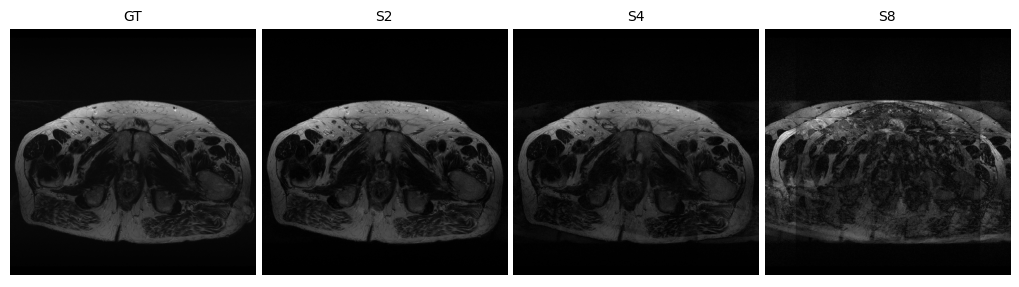

In [51]:
rf.imshow(np.abs(np.rot90(np.array([gt,s2,s4,s8]), axes=(1,2))), cmap="gray", titles = ["GT","S2","S4","S8"], fontsize = 10,tile_shape=(1,4), colorbar=False, size=[10, 2.5])

Here is an example on how to compare any of this images to the ground truth

In [52]:
print(rf.iqm(rf.normalize8(np.abs(gt)),rf.normalize8(np.abs(s2))))

SSIM: (0.7723108853469064, 0.9625535010848069)
VIFP: 0.6851246199754707
MS-SSIM: (0.9841872497282166+0j)


## Saving information in csv file

In [53]:
ssim, vifp, ms_ssim = rf.iqm(rf.normalize8(np.abs(gt)), rf.normalize8(np.abs(s2)), string=False)

In [54]:
data = ['SENSE', 2, patient, slice, ssim, vifp, ms_ssim]

```
with open('alldata.csv', 'a', encoding='UTF8') as f:
            writer = csv.writer(f)
            writer.writerow(data)
f.close
```